In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
#Reading in data and basic tidying

players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(players_url)

sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions_data <- read_csv(sessions_url)

sessions_per_player <- sessions_data |>
group_by(hashedEmail) |>
summarize(sessions = n()) |>
arrange(-sessions) 

combined_data <- left_join(players_data, sessions_per_player, by = "hashedEmail")

modified_data <- combined_data |>
  mutate(gender = as_factor(gender))

clean_data <- modified_data |>
    select(- individualId, -organizationName) |>
    filter(age <90)
clean_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1


In [4]:
# Assigning labels: Good (1h+ played) vs Bad (<1h played) contributor

# As a 0/1 variable
clean_data$over1 <- as.numeric(clean_data$played_hours >= 1)

# Examine new variable
table(clean_data$over1, useNA = "ifany")


# Check range of original variable at levels of new
tapply(clean_data$played_hours, clean_data$over1, range)



# As a factor
clean_data$over1_fac <- factor(clean_data$over1,
                            levels = 0:1,
                            labels = c("<1h", ">1h"))

# Examine new variable
table(clean_data$over1_fac, useNA = "ifany")


# Check range of original variable at levels of new
tapply(clean_data$played_hours, clean_data$over1_fac, range)


#Final wrangling of the data!
labelled_data <- clean_data |>
    select(-over1) |>
    mutate(contributor_type = fct_recode(over1_fac, "Bad" = "<1h", "Good" = ">1h")) |>
    select(-over1_fac) |>
    mutate(sessions = if_else(is.na(sessions), 0, sessions)) #Changing sessions "NA" to 0 sessions
labelled_data


  0   1 
152  42 

$`0`
[1] 0.0 0.9

$`1`
[1]   1.0 223.1


<1h >1h 
152  42 

$`<1h`
[1] 0.0 0.9

$`>1h`
[1]   1.0 223.1

experience,subscribe,hashedEmail,played_hours,name,gender,age,sessions,contributor_type
<chr>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,Good
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,Good
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,Bad
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,Bad
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,Bad
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0,Bad
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0,Bad
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,Bad
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1,Bad


In [6]:
good_contributors <- labelled_data |>
    filter(contributor_type == "Good")
#good_contributors

In [7]:
good_contributors_experience <- good_contributors |>
group_by(experience) |>
summarize(count = n()) |>
mutate(percentage = (count/42)*100)

good_contributors_experience


default_experience_stats <- players_data |>
group_by(experience) |>
summarize(count = n()) |>
mutate(percent = (count / 196) * 100) 
default_experience_stats 

experience,count,percentage
<chr>,<int>,<dbl>
Amateur,13,30.95238
Beginner,9,21.42857
Pro,4,9.52381
Regular,8,19.04762
Veteran,8,19.04762


experience,count,percent
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


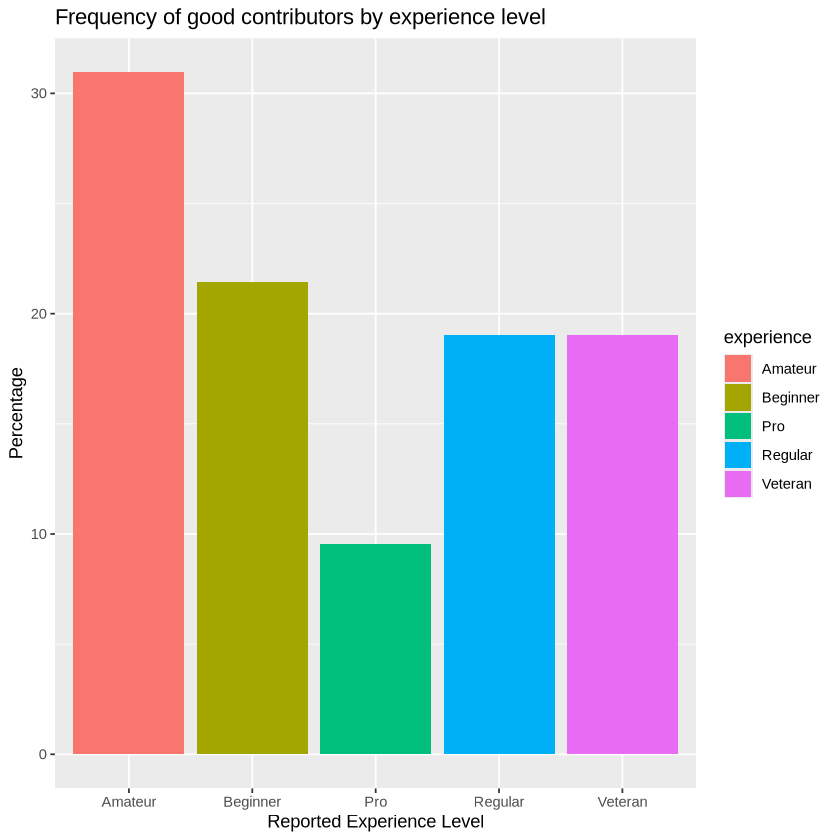

In [8]:
gc_experience <- ggplot(good_contributors_experience, aes(x = experience, y = percentage, fill = experience)) + geom_bar(stat = "identity",position = "dodge") + labs(x = "Reported Experience Level", y = "Percentage", title = "Frequency of good contributors by experience level")
gc_experience

In [9]:
gc_subscribe <- good_contributors |>
group_by(subscribe) |>
summarize(count = n()) |>
mutate(percentage = (count/42)*100)

gc_subscribe

default_sub_stats <- players_data |>
group_by(subscribe) |>
summarize(count = n()) |>
mutate(percent = (count/196)*100)

default_sub_stats

subscribe,count,percentage
<lgl>,<int>,<dbl>
FALSE,9,21.42857
TRUE,33,78.57143


subscribe,count,percent
<lgl>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


In [10]:
gc_gender <- good_contributors |>
group_by(gender) |>
summarize(count = n()) |>
mutate(percentage = (count/42)*100)

gc_gender

default_gender_stats <- players_data |>
group_by(gender) |>
summarize(count = n()) |>
mutate(percent = (count/196)*100)

default_gender_stats

gender,count,percentage
<fct>,<int>,<dbl>
Male,26,61.904762
Female,9,21.428571
Non-binary,4,9.523810
Prefer not to say,2,4.761905
Agender,1,2.380952


gender,count,percent
<chr>,<int>,<dbl>
Agender,2,1.0204082
Female,37,18.8775510
Male,124,63.2653061
Non-binary,15,7.6530612
Other,1,0.5102041
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245


mean_age,median_age
<dbl>,<dbl>
20.30952,19.5


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


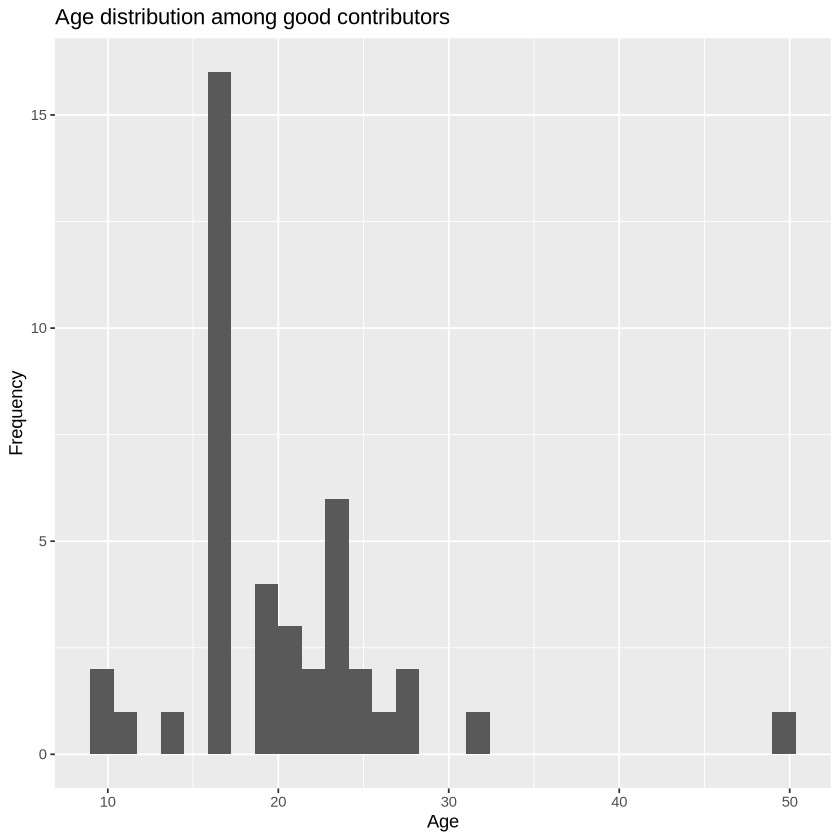

mean_age,median_age
<dbl>,<dbl>
20.52062,19


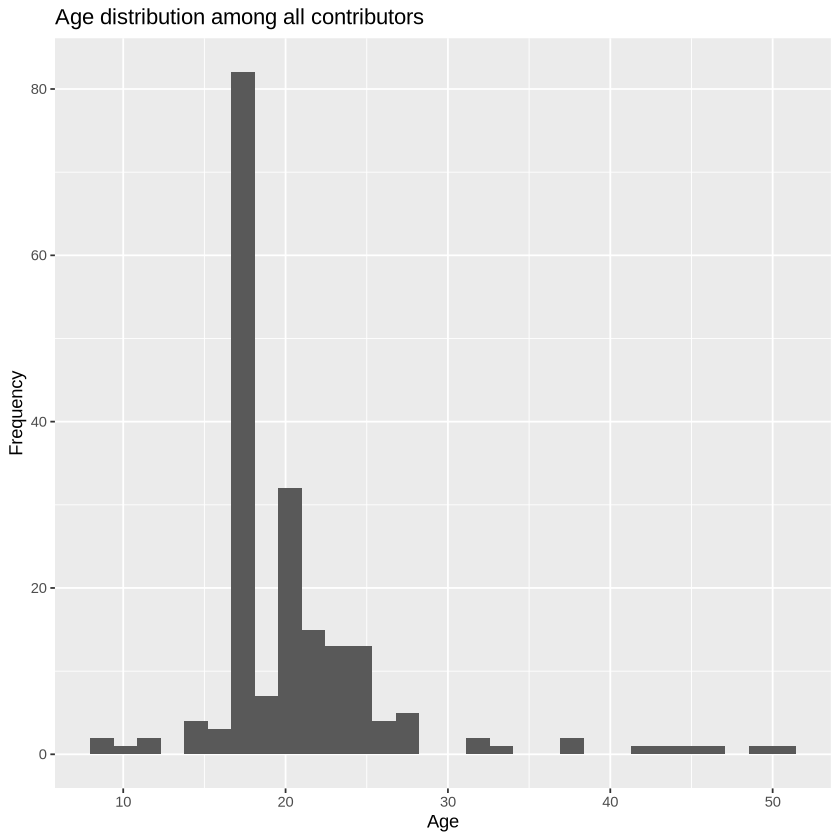

In [11]:
age_stats <- good_contributors |>
summarize(mean_age = mean(age), median_age = median(age))

age_stats

gc_filter <- filter(good_contributors, age < 51)
gc_age_histo <- ggplot(gc_filter, aes(age)) + geom_histogram() + labs(x = "Age", y = "Frequency", title = "Age distribution among good contributors")
gc_age_histo


def_filter <- filter(players_data, age < 51)
def_age_histo <- ggplot(def_filter, aes(age)) + geom_histogram() + labs(x = "Age", y = "Frequency", title = "Age distribution among all contributors")
def_age_histo


default_age_stats <- players_data |>
filter(age <= 80) |>
summarize(mean_age = mean(age), median_age = median(age))

default_age_stats